<a href="https://colab.research.google.com/github/Adi15Jadhav/Deep_learning_assignments/blob/main/Neural_Network_for_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train , y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train), len(X_test)

(60000, 10000)

In [7]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

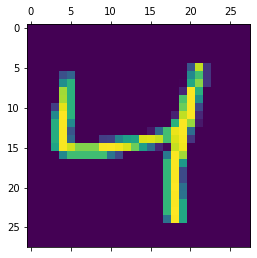

In [11]:
plt.matshow(X_train[2])

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
X_train_flattern = X_train.reshape(len(X_train),28*28)
X_train_flattern

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_train_flattern.shape

(60000, 784)

In [18]:
y_train.shape

(60000,)

In [14]:
X_test_flattern = X_test.reshape(len(X_test),28*28)
X_test_flattern.shape

(10000, 784)

In [15]:
model = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
                  ])

model.compile(
              optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattern,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 17.5030 - accuracy: 0.7740
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.2907 - accuracy: 0.8779
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7850 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4460 - accuracy: 0.8879
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3174 - accuracy: 0.8859


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scale = MinMaxScaler()

In [23]:
X_train_flattern_scaled = scale.fit_transform(X_train_flattern)
X_test_flattern_scaled = scale.transform(X_test_flattern)

In [24]:
X_test_flattern_scaled.shape

(10000, 784)

In [25]:
model_2 = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
                  ])

model_2.compile(
              optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model_2.fit(X_train_flattern_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7194 - accuracy: 0.8127
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3102 - accuracy: 0.9128
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2724 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9256


In [26]:
model_2.evaluate(X_test_flattern_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9255


[0.26627641916275024, 0.9254999756813049]

In [29]:
model_3 = keras.Sequential([
                  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
                  ])

model_3.compile(
              optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model_3.fit(X_train_flattern_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9852


In [30]:
model_3.evaluate(X_test_flattern_scaled,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.9760


[0.07843516767024994, 0.9760000109672546]

In [33]:
model_4 = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(100,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
                  ])

model_4.compile(
              optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model_4.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.3243 - accuracy: 0.7880
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4232 - accuracy: 0.8962
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.9261
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2398 - accuracy: 0.9390
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2208 - accuracy: 0.9413
